In [1]:
from data_utils import generate_P_h_given_h, \
    generate_P_m_given_h, generate_dataset_pickle, HM_Dataset
import matplotlib.pyplot as plt

In [2]:
h_size = 32
m_size = 64
seq_len = 128
num_samples_train = 500

In [3]:
# Step 1: Generate transition matrices
h_token_ids, T_h = generate_P_h_given_h(
    num_peaks=3,
    peaks_probability=0.9,
    h_size=h_size,
    seed=42
)
P_m_h, m_token_ids = generate_P_m_given_h(num_peaks=2, peaks_probability=0.9,
                                          m_size=m_size, h_token_ids=h_token_ids, seed=42)

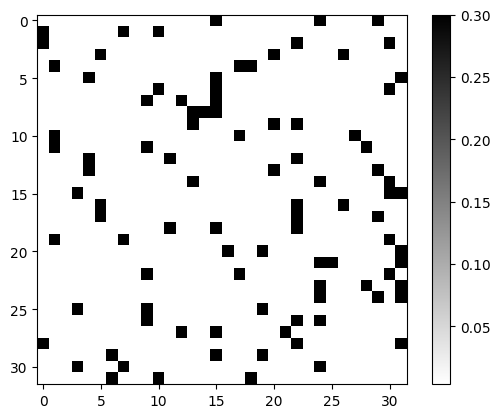

In [4]:
plt.imshow(T_h, cmap='gray_r')
plt.colorbar()

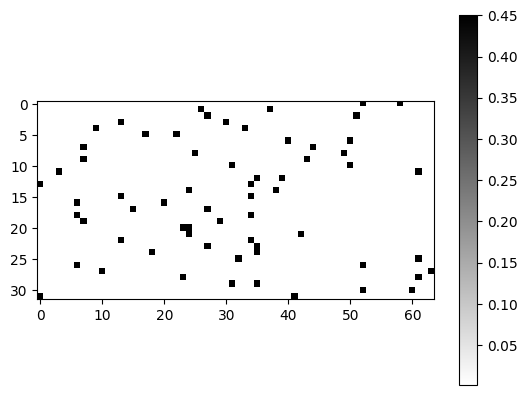

In [5]:
plt.imshow(P_m_h, cmap='gray_r')
plt.colorbar()

In [6]:
print(h_token_ids)
print(m_token_ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [7]:
print(T_h.shape)
print(P_m_h.shape)

(32, 32)
(32, 64)


In [8]:
# Step 2: Generate dataset pickle
generate_dataset_pickle("data/train.pkl", num_samples=num_samples_train, 
                        h_token_ids=h_token_ids, m_token_ids=m_token_ids, 
                        T_h=T_h, P_m_h=P_m_h, seq_len=seq_len)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:02<00:00, 203.35it/s]

Saved 500 samples to data/train.pkl


In [9]:
# Step 3: Load as PyTorch Dataset
train_dataset = HM_Dataset("data/train.pkl")
d = train_dataset[0]
h_seq = d['h_seq']
m_seq = d['m_seq']
print(h_seq.shape, m_seq.shape)
print(train_dataset.m_vocab_size)
print(train_dataset.h_vocab_size)
print(train_dataset.seq_len)
print(train_dataset.mask_token_id)

torch.Size([128]) torch.Size([128])
64
33
128
32


In [10]:
print(h_seq)
print(m_seq)

tensor([11,  9, 20, 31,  6, 30,  7, 12, 11,  9, 20, 19,  1,  7,  9, 20, 19,  7,
        15,  3, 20, 16, 22, 30,  2, 22, 17, 22,  9, 13, 29, 15,  9, 20, 22,  9,
        20, 19, 30,  3, 18, 15, 30,  7, 12, 22, 30,  7, 15, 30,  7,  9, 28,  0,
        15,  3, 20, 16,  5,  4,  1,  7, 15, 29, 15, 30,  3,  7, 24, 29,  6, 15,
        13, 20, 16,  5,  4, 18, 22,  9, 13, 29,  6, 10, 27, 12, 19, 30,  7,  5,
         4, 18, 22, 30,  3, 26, 24, 29, 19, 30, 21, 25,  9, 13, 20, 16, 26, 30,
        24, 24, 24, 24, 29, 19, 30,  7, 15, 31,  6, 30,  7,  9, 20, 16, 22, 17,
        22, 17])
tensor([61, 43, 24,  0,  9, 60,  7, 39, 61, 32, 24, 33, 37, 44, 43, 23,  7, 44,
        13, 17, 23, 20, 34, 60, 45, 34, 15, 34,  7, 35, 35, 13,  7, 23, 13,  7,
        24, 29, 60, 30, 34, 34, 52, 44, 35, 49, 60, 44, 13, 60, 44,  7, 23, 58,
        13, 30, 23,  6, 22,  9, 37,  7,  1, 35, 34, 60, 30, 44, 18, 31, 50, 34,
        34, 23,  6, 22, 33, 34, 34, 43,  0, 31, 40, 31, 63, 35, 29, 52,  7, 17,
         9, 34, 13, 60,